# Import

In [1]:
pip install pandas_ta


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install vectorbt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_ta as ta
import vectorbt as vbt
import yfinance as yf
from datetime import datetime
from scipy import stats
from scipy import stats

from sklearn.model_selection import (GridSearchCV, 
                                     TimeSeriesSplit,
                                     train_test_split)
from sklearn.preprocessing import (OrdinalEncoder, 
                                   OneHotEncoder)
from sklearn.linear_model import (LinearRegression, 
                                  RidgeCV, 
                                  LassoCV, 
                                  ElasticNetCV)
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error, 
                             mean_absolute_percentage_error)

import warnings
warnings.filterwarnings('ignore')

In [2]:
start_date = datetime(2023,1,1)
end_date = datetime(2023,2,10)

In [3]:
%%time
data = pd.DataFrame()
data = data.ta.ticker('spy',start = start_date, end = end_date,interval = '5m')

Wall time: 5.35 s


In [4]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0
...,...,...,...,...,...,...,...
2023-02-09 15:35:00-05:00,406.040009,406.809998,405.809998,406.799988,1551788,0,0
2023-02-09 15:40:00-05:00,406.799988,407.170013,406.540009,407.119995,1462716,0,0
2023-02-09 15:45:00-05:00,407.119995,407.549988,406.799988,407.000000,2273052,0,0


# Prepare Data

In [5]:
data.ta.macd(fast=12, slow=21, signal=9,append=True)

,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9
Datetime,,,
2023-01-03 09:30:00-05:00,NaN,NaN,NaN
2023-01-03 09:35:00-05:00,NaN,NaN,NaN
2023-01-03 09:40:00-05:00,NaN,NaN,NaN
2023-01-03 09:45:00-05:00,NaN,NaN,NaN
2023-01-03 09:50:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-02-09 15:35:00-05:00,-0.557726,-0.084563,-0.473163
2023-02-09 15:40:00-05:00,-0.526630,-0.042773,-0.483857
2023-02-09 15:45:00-05:00,-0.502897,-0.015232,-0.487665


In [9]:
window = 21
target_column = 'MACDh_12_21_9'
roll = data[target_column].rolling(window)
data['z-score-MACDh'] = (data[target_column] - roll.mean()) / roll.std()
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh
Datetime,,,,,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 15:35:00-05:00,406.040009,406.809998,405.809998,406.799988,1551788,0,0,-0.557726,-0.084563,-0.473163,-1.635637
2023-02-09 15:40:00-05:00,406.799988,407.170013,406.540009,407.119995,1462716,0,0,-0.526630,-0.042773,-0.483857,-0.466368
2023-02-09 15:45:00-05:00,407.119995,407.549988,406.799988,407.000000,2273052,0,0,-0.502897,-0.015232,-0.487665,0.310375


In [39]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh
Datetime,,,,,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0,NaN,NaN,NaN,NaN
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0,NaN,NaN,NaN,NaN


In [43]:
data['Close'].pct_change(12).shift(-12)

Datetime
2023-01-03 09:30:00-05:00   -0.010065
2023-01-03 09:35:00-05:00   -0.011365
2023-01-03 09:40:00-05:00   -0.010953
2023-01-03 09:45:00-05:00   -0.005489
2023-01-03 09:50:00-05:00   -0.004833
                               ...   
2023-02-09 15:35:00-05:00         NaN
2023-02-09 15:40:00-05:00         NaN
2023-02-09 15:45:00-05:00         NaN
2023-02-09 15:50:00-05:00         NaN
2023-02-09 15:55:00-05:00         NaN
Name: Close, Length: 2106, dtype: float64

In [45]:
data['Profit-Loss'] = data['Close'].pct_change(12).shift(-12)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,Profit-Loss
Datetime,,,,,,,,,,,,
2023-01-03 09:30:00-05:00,384.369995,385.119995,383.589996,384.510010,4178396,0,0,NaN,NaN,NaN,NaN,-0.010065
2023-01-03 09:35:00-05:00,384.540009,385.440002,384.325012,385.390015,962032,0,0,NaN,NaN,NaN,NaN,-0.011365
2023-01-03 09:40:00-05:00,385.390015,386.429993,385.165497,385.279999,1629643,0,0,NaN,NaN,NaN,NaN,-0.010953
2023-01-03 09:45:00-05:00,385.279999,385.399994,383.019989,383.500000,1997329,0,0,NaN,NaN,NaN,NaN,-0.005489
2023-01-03 09:50:00-05:00,383.489990,383.959991,382.500000,382.800110,1800303,0,0,NaN,NaN,NaN,NaN,-0.004833
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 15:35:00-05:00,406.040009,406.809998,405.809998,406.799988,1551788,0,0,-0.557726,-0.084563,-0.473163,-1.635637,NaN
2023-02-09 15:40:00-05:00,406.799988,407.170013,406.540009,407.119995,1462716,0,0,-0.526630,-0.042773,-0.483857,-0.466368,NaN
2023-02-09 15:45:00-05:00,407.119995,407.549988,406.799988,407.000000,2273052,0,0,-0.502897,-0.015232,-0.487665,0.310375,NaN


In [46]:
data = data.dropna()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9,z-score-MACDh,Profit-Loss
Datetime,,,,,,,,,,,,
2023-01-03 13:30:00-05:00,379.519989,379.609985,379.179993,379.209991,392933,0,0,-0.223269,0.137801,-0.361070,1.160757,-0.002307
2023-01-03 13:35:00-05:00,379.230011,379.619995,379.079987,379.159912,376260,0,0,-0.186774,0.139437,-0.326211,1.095096,-0.002031
2023-01-03 13:40:00-05:00,379.154999,379.749115,379.130005,379.355408,617556,0,0,-0.143784,0.145942,-0.289726,1.155702,0.000249
2023-01-03 13:45:00-05:00,379.353607,379.356506,378.959991,379.306488,388792,0,0,-0.111783,0.142354,-0.254137,0.961196,0.003173
2023-01-03 13:50:00-05:00,379.309998,379.929993,379.130005,379.760010,388273,0,0,-0.057060,0.157662,-0.214721,1.256513,0.000685


# Train Model

In [49]:
my_features = ['MACD_12_21_9', 'MACDs_12_21_9','z-score-MACDh']
X = data[my_features]
y = data['Profit-Loss']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
reg = LinearRegression()

In [55]:
reg.fit(X_train, y_train)

LinearRegression()

In [57]:
print(reg.coef_)
print(reg.intercept_)

[ 0.00359799 -0.00264238 -0.0003721 ]
0.0003047215775582316


# Test Model

## training set

In [58]:
y_pred_train = reg.predict(X_train)

In [59]:
y_pred_test = reg.predict(X_test)

In [60]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.02462630977677871
mean_squared_error =		 1.3490590878282351e-05
mean_absolute_error =		 0.0027277457728659
mean_absolute_percentage_error = 730668221.8515977


Text(0, 0.5, 'Actual')

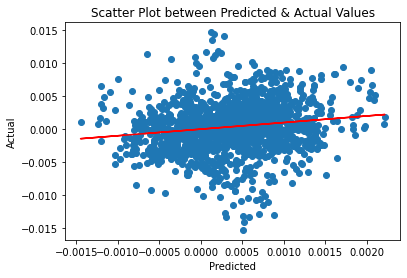

In [61]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## test set

In [62]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.021611635683778108
mean_squared_error =		 1.801792655265721e-05
mean_absolute_error =		 0.003085523197523573
mean_absolute_percentage_error = 13197550943.264074


Text(0, 0.5, 'Actual')

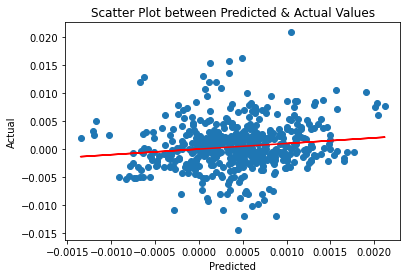

In [63]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Ridge Regression

In [64]:
alphas = np.logspace(-3, 3, num=100)

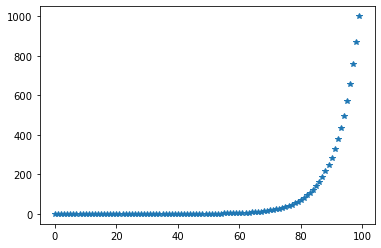

In [65]:
plt.plot(alphas, '*')

In [66]:
%%time

tscv = TimeSeriesSplit(n_splits = 5)
ridge = RidgeCV(alphas=alphas, cv=tscv)
ridge.fit(X_train, y_train)

Wall time: 2.27 s


RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

In [67]:
ridge.alpha_

0.9326033468832199

In [68]:
ridge.coef_

array([ 0.00305468, -0.00204816, -0.00033811])

In [69]:
ridge.intercept_

0.00030279941329884705

In [70]:
# Predict training set
y_pred_train = ridge.predict(X_train)

In [71]:
# Predict test set
y_pred_test = ridge.predict(X_test)

In [72]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.024499357156779644
mean_squared_error =		 1.3492346785658672e-05
mean_absolute_error =		 0.0027287775793406336
mean_absolute_percentage_error = 760653978.3372645


Text(0, 0.5, 'Actual')

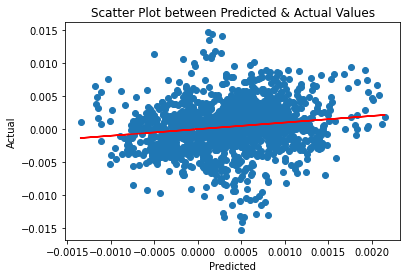

In [73]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [74]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.02193081746073522
mean_squared_error =		 1.8012048525051906e-05
mean_absolute_error =		 0.0030846949423495307
mean_absolute_percentage_error = 12575275858.077599


Text(0, 0.5, 'Actual')

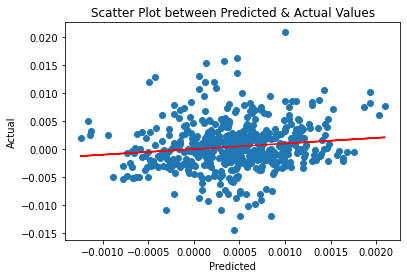

In [75]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Lasso

In [76]:
tscv = TimeSeriesSplit(n_splits = 5)
lasso = LassoCV(n_alphas=100, cv=tscv)

In [77]:
lasso.fit(X_train, y_train)

LassoCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

In [78]:
lasso.alpha_

4.031918745660265e-07

In [79]:
lasso.coef_

array([ 0.00345117, -0.00248097, -0.00036264])

In [80]:
lasso.intercept_

0.00030416154001391705

In [86]:
# Predict training set
y_pred_train2 = lasso.predict(X_train)

In [87]:
y_pred_test2 = lasso.predict(X_test)

In [88]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train2))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.024616985450846007
mean_squared_error =		 1.3490719844921121e-05
mean_absolute_error =		 0.0027279895017435093
mean_absolute_percentage_error = 740323526.7070316


Text(0, 0.5, 'Actual')

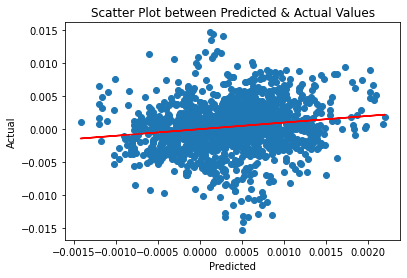

In [89]:
plt.scatter(y_pred_train2, y_train)

plt.plot(y_pred_train2, y_pred_train2, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [90]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.021720281764056937
mean_squared_error =		 1.8015925734611848e-05
mean_absolute_error =		 0.0030852492720024154
mean_absolute_percentage_error = 13026704612.009918
